## Integrated Mean Squared Prediction Error

This notebook shows the `crit_IMSPE` functionality, based on the example from the `hetGP` library (see `?hetGP::crit_IMSPE` for more detail)

Text(0, 0.5, 'IMSPE')

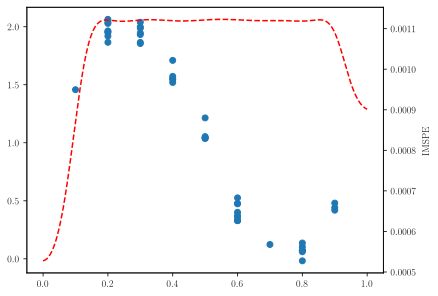

In [1]:
%config InlineBackend.figure_formats = ['svg']
from hetgpy.IMSE import crit_IMSPE, Wij
from hetgpy.hetGP import hetGP
from hetgpy.find_reps import find_reps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

random = np.random.default_rng(42)
def ftest(x, coef = 0.1):
    return np.sin(2 * np.pi * x) + random.normal(loc = 1, scale = coef)

n = 9
designs = np.linspace(0.1, 0.9,n).reshape(-1,1)
reps = random.choice(1 + np.arange(10), size = n)

X = designs[np.repeat(np.arange(n),reps)]
Z = np.array(
    [
        ftest(x) for x in X
    ]
).squeeze()
model = hetGP()
model.mleHetGP(
    X = X,
    Z = Z, 
    lower = np.array([0.1]), 
    upper = np.array([5]),
    known = {},
    init = {})

fig, ax = plt.subplots()
ax.scatter(X,Z)

ngrid = 501
xgrid = np.linspace(0,1,ngrid).reshape(-1,1)

## Precalculations
Wijs = Wij(mu1 = model.X0, theta = model.theta, type = model.covtype)
IMSPE_grid = np.array([crit_IMSPE(x,model=model,Wijs=Wijs) for x in xgrid])
ax2 = ax.twinx()
ax2.plot(xgrid.squeeze(),IMSPE_grid.squeeze(),'r--')
ax2.set_ylabel('IMSPE')